# 問題１ 練習のために特徴量の選択

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler

aims_data = pd.read_csv("train.csv")
aims_data4 = aims_data.loc[:,['GrLivArea','YearBuilt','SalePrice']]
aims_data4

,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000
...,...,...,...
1455,1647,1999,175000
1456,2073,1978,210000
1457,2340,1941,266500
1458,1078,1950,142125


# 【問題2】線形回帰による推定と評価

In [18]:
from sklearn.model_selection import train_test_split

X = aims_data4.iloc[:,0:2].values
y = aims_data4.iloc[:,2].values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linear_reg = LinearRegression()
linear_reg.fit(X_train,y_train)
y_pred_lin = linear_reg.predict(X_test)

print("評価値：{}".format(mean_squared_error(y_test, y_pred_lin)))

評価値：2722477218.6273875


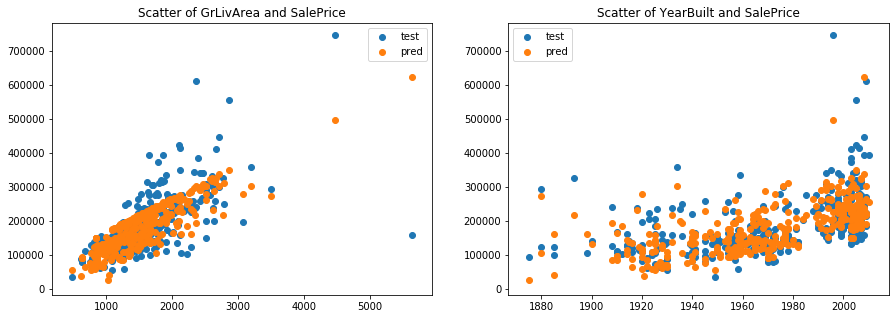

In [63]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title( "Scatter of GrLivArea and SalePrice")
plt.scatter(X_test[:,0],y_test,label="test")
plt.scatter(X_test[:,0],y_pred_lin,label="pred")
plt.legend()

plt.subplot(1,2,2)
plt.title( "Scatter of YearBuilt and SalePrice")
plt.scatter(X_test[:,1],y_test,label="test")
plt.scatter(X_test[:,1],y_pred_lin,label="pred")
plt.legend()
plt.show()

# 【問題３】手法の比較

## SVM

In [67]:
from sklearn.svm import SVR

svm_reg = SVR(gamma="auto")
svm_reg.fit(X_train,y_train)
y_pred_svm = svm_reg.predict(X_test)

print("評価値：{}".format(mean_squared_error(y_test, y_pred_svm)))

評価値：7156647796.007132


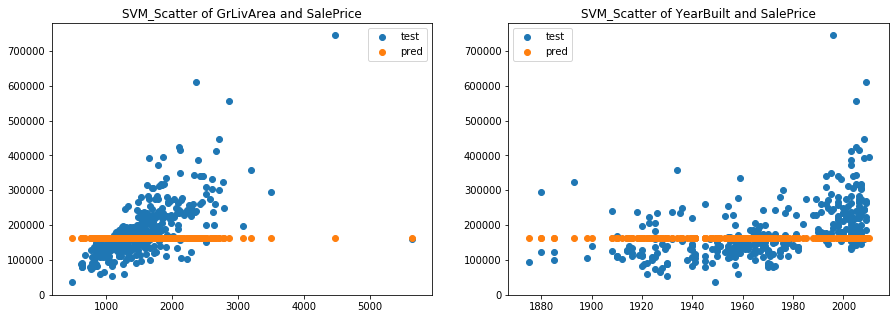

In [68]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title( "SVM_Scatter of GrLivArea and SalePrice")
plt.scatter(X_test[:,0],y_test,label="test")
plt.scatter(X_test[:,0],y_pred_svm,label="pred")
plt.legend()

plt.subplot(1,2,2)
plt.title( "SVM_Scatter of YearBuilt and SalePrice")
plt.scatter(X_test[:,1],y_test,label="test")
plt.scatter(X_test[:,1],y_pred_svm,label="pred")
plt.legend()
plt.show()

## 決定木

In [39]:
from sklearn.tree import DecisionTreeRegressor

DTC_reg = DecisionTreeRegressor()
DTC_reg.fit(X_train,y_train)
y_pred_DTC = DTC_reg.predict(X_test)

print("評価値：{}".format(mean_squared_error(y_test, y_pred_DTC)))

評価値：3322792159.886225


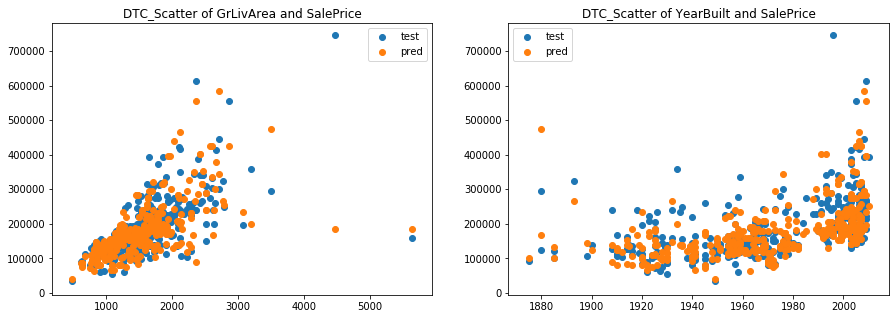

In [40]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title( "DTC_Scatter of GrLivArea and SalePrice")
plt.scatter(X_test[:,0],y_test,label="test")
plt.scatter(X_test[:,0],y_pred_DTC,label="pred")
plt.legend()

plt.subplot(1,2,2)
plt.title( "DTC_Scatter of YearBuilt and SalePrice")
plt.scatter(X_test[:,1],y_test,label="test")
plt.scatter(X_test[:,1],y_pred_DTC,label="pred")
plt.legend()
plt.show()

## ランダムフォレスト

In [69]:
from sklearn.ensemble import RandomForestRegressor
RFC_reg = RandomForestRegressor(n_estimators = 100)
RFC_reg.fit(X_train,y_train)

y_pred_RFC = RFC_reg.predict(X_test)
print("評価値：{}".format(mean_squared_error(y_test, y_pred_RFC)))

評価値：1829635967.2117577


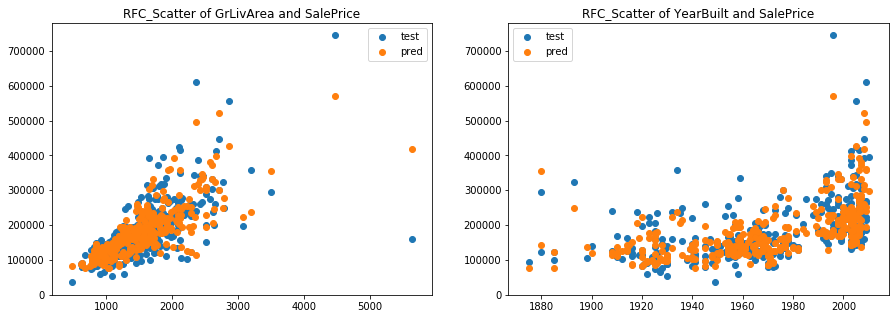

In [70]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title( "RFC_Scatter of GrLivArea and SalePrice")
plt.scatter(X_test[:,0],y_test,label="test")
plt.scatter(X_test[:,0],y_pred_RFC,label="pred")
plt.legend()

plt.subplot(1,2,2)
plt.title( "RFC_Scatter of YearBuilt and SalePrice")
plt.scatter(X_test[:,1],y_test,label="test")
plt.scatter(X_test[:,1],y_pred_RFC,label="pred")
plt.legend()
plt.show()

## 指標値について 

In [73]:
from sklearn.metrics import r2_score

ev_list = [y_pred_linear, y_pred_svm, y_pred_DTC, y_pred_RFC]
ev_list_str = ["y_pred_lin", "y_pred_svm", "y_pred_DTC", "y_pred_RFC"]

count = 0
for i in ev_list :
    print("平均２乗誤差ＭＳＥ：{}：{}".format(ev_list_str[count],mean_squared_error(y_test, i)))
    count = count + 1

print("")

count = 0
for i in ev_list :
    print("決定係数：{}：{}".format(ev_list_str[count],r2_score(y_test, i)))
    count = count + 1

平均２乗誤差ＭＳＥ：y_pred_lin：2722477218.6273875
平均２乗誤差ＭＳＥ：y_pred_svm：7156647796.007132
平均２乗誤差ＭＳＥ：y_pred_DTC：3322792159.886225
平均２乗誤差ＭＳＥ：y_pred_RFC：1829635967.2117577

決定係数：y_pred_lin：0.5954134021821348
決定係数：y_pred_svm：-0.063547479389777
決定係数：y_pred_DTC：0.5062007622961713
決定係数：y_pred_RFC：0.7280982973320821


＜考察１＞指標値について。  
今回のデータ分割による回帰分析の指標値は、下記のようになった（ＲＭＳＥやＭＡＥは、ＭＳＥと似ていると考えて省略）。  
平均２乗誤差ＭＳＥ：y_pred_lin：2722477218.6273875  
平均２乗誤差ＭＳＥ：y_pred_svm：7156647796.007132  
平均２乗誤差ＭＳＥ：y_pred_DTC：3322792159.886225  
平均２乗誤差ＭＳＥ：y_pred_RFC：1829635967.2117577  

決定係数：y_pred_lin：0.5954134021821348  
決定係数：y_pred_svm：-0.063547479389777  
決定係数：y_pred_DTC：0.5062007622961713  
決定係数：y_pred_RFC：0.7280982973320821  

サポートベクタ―マシンを除くと、ランダムフォレストがＭＳＥにおいて優れ、決定木が決定係数において優れているように思われる。  

＜考察２＞グラフについて  
GrLivAreaとSalePriceの散布図では、決定木とランダムフォレストがテストデータと比較的マッチしているように思われる。線形回帰では、予測データによる分散がテストデータによる分散よりも小さくなっており現状ではあまりマッチしていない。  
YearBuiltとSalePriceの散布図では、線形回帰、決定木、ランダムフォレストの３種類では明確な差異を見つけるのは難しかった。  
サポートベクタマシンでは、ハイパーパラメータの設定が必要であるのか、現状ではまともなモデリングをしていないように思われる。